In [2]:
length = 10 #Length of beam (m)
sub_interval = 5
end_force = 1000 #end force applied to beam (N)
inertia = 1 # Second moment of area of the Beam (m^4)
youngs_modulus = 200000 # Young's Modulus of the beam (Pa)

import numpy as np

def deflection_cantilever_beam(length,sub_interval,end_force,inertia,youngs_modulus):
     # Calculate the bending rigidity of the beam
     flexural_rigidity = youngs_modulus * inertia

     # Create an array for the distances from the free end
     distances = np.linspace(0, length , sub_interval)

     # Calculate slope for each distance
     slope = []
     # Calculate deflection for each distance
     deflection = []

     for distance in distances:
          s = ( -(end_force * distance**2 * 0.5) + (end_force * length**2 * 0.5)) / (flexural_rigidity)
          slope.append(s)

          d = ( -(end_force * distance**3 / 6) + (end_force * length**2 * distance * 0.5) - (end_force * length**3 / 3 ) ) / (flexural_rigidity)
          deflection.append(d)

     return distances,slope,deflection

distances,slope,deflection = deflection_cantilever_beam(length,sub_interval,end_force,inertia,youngs_modulus)

print (" The Array below gives the distances from the free end of the cantilever beam" )
print (distances,"\n")

print (" The Array below gives the slope from the free end of the cantilever beam" )
print (slope,"\n")

print (" The Array below gives the deflection from the free end of the cantilever beam" )
print (deflection,"\n")

 The Array below gives the distances from the free end of the cantilever beam
[ 0.   2.5  5.   7.5 10. ] 

 The Array below gives the slope from the free end of the cantilever beam
[0.25, 0.234375, 0.1875, 0.109375, 0.0] 

 The Array below gives the deflection from the free end of the cantilever beam
[-1.6666666666666665, -1.0546875, -0.5208333333333333, -0.14322916666666657, 2.9103830456733706e-16] 



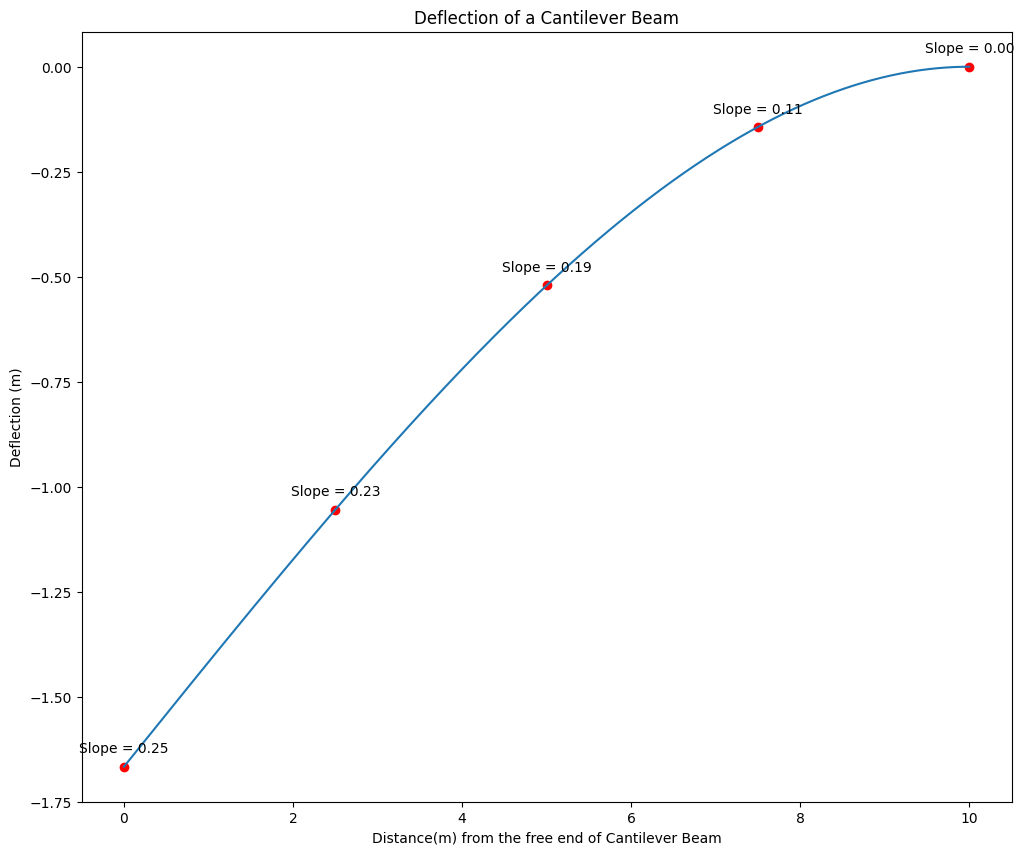

In [8]:
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def create_cubic_spline (x,y):
  cs = CubicSpline (x,y)
  return cs

slope_spline = create_cubic_spline(distances,slope)
deflection_spline = create_cubic_spline(distances,deflection)

# Generate a finer distance array for plotting
finer_distances = np.linspace (0,length,1000)

# Evaluate the spline at the finer distance array
finer_slope = slope_spline (finer_distances)
finer_deflection = deflection_spline (finer_distances)

# Create a new figure with the specified size
plt.figure (figsize=(12,10))

# plot beam deflection
plt.plot(finer_distances,finer_deflection)
plt.xlabel('Distance(m) from the free end of Cantilever Beam')
plt.ylabel('Deflection (m)')
plt.title ('Deflection of a Cantilever Beam')

# Add quiver plot for slope values
# plt.quiver(finer_distances,finer_deflection,np.cos(finer_slope),np.sin(finer_slope),color='red',scale=200,scale_units='inches')

# Add scatter plot for slope values
plt.scatter(distances,deflection,color='red')
for i, (x,y) in enumerate(zip(distances,deflection)):
  plt.annotate (f'Slope = {slope[i]:.2f}',(x,y), textcoords="offset points",xytext=(0,10),ha='center')

plt.show()
